# Florian Wirtz Analysis 23/24

In [1]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

In [2]:
matches = sb.matches(competition_id=9,season_id=281)

In [3]:
bayer_leverkusen_matches = matches[(matches['home_team'] == 'Bayer Leverkusen') | (matches['away_team'] == 'Bayer Leverkusen')]

*Analysis of Florian Wirtz's shots*

In [4]:
wirtz_shots = pd.DataFrame()

for i in range (len(bayer_leverkusen_matches)):
    match_id = bayer_leverkusen_matches.iloc[i]['match_id']
    match_shots = sb.events(match_id=match_id, split=True, flatten_attrs=False)["shots"]
    wirtz_shots_match = match_shots[match_shots['player_id'] == 40724]
    wirtz_shots = pd.concat([wirtz_shots, wirtz_shots_match])

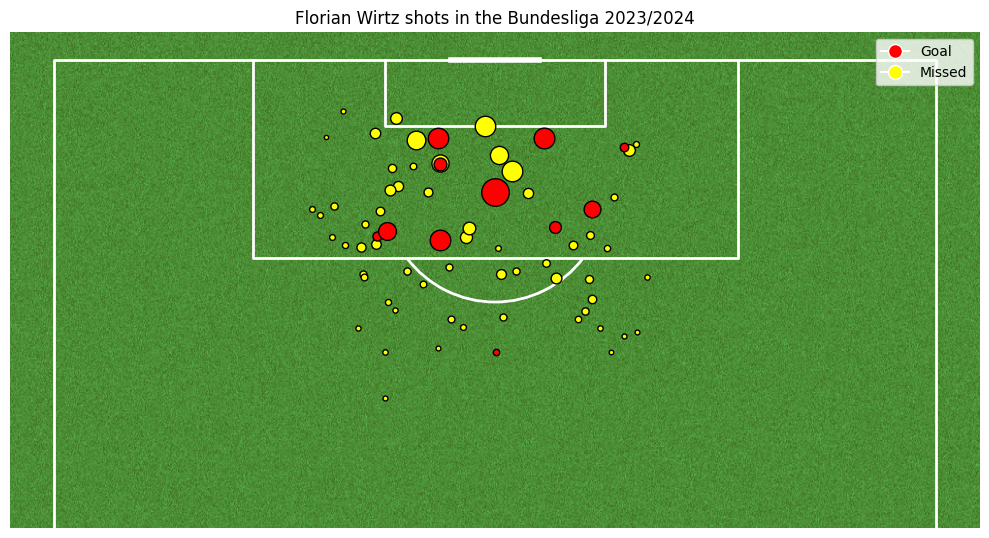

In [5]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=False)
fig, ax = pitch.draw(figsize=(10, 10))

ax.set_ylim(77.5, 122.5)

for i in range(len(wirtz_shots)):
    x = wirtz_shots.iloc[i]['location'][0]
    y = wirtz_shots.iloc[i]['location'][1]
    if wirtz_shots.iloc[i]['shot']['outcome']['name'] == 'Goal':
        pitch.scatter(x, y, ax=ax, color='red', edgecolors='black', zorder=2, s=wirtz_shots.iloc[i]['shot']['statsbomb_xg']*500)
    else:
        pitch.scatter(x, y, ax=ax, color='yellow', edgecolors='black', zorder=1, s=wirtz_shots.iloc[i]['shot']['statsbomb_xg']*500)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Goal'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Missed')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.title('Florian Wirtz shots in the Bundesliga 2023/2024')
plt.show()

*Analysis of Florian Wirtz's passes*

In [6]:
wirtz_passes = pd.DataFrame()

for i in range (len(bayer_leverkusen_matches)):
    match_id = bayer_leverkusen_matches.iloc[i]['match_id']
    match_passes = sb.events(match_id=match_id, split=True, flatten_attrs=False)["passes"]
    wirtz_passes_match = match_passes[match_passes['player_id'] == 40724]
    wirtz_passes = pd.concat([wirtz_passes, wirtz_passes_match])

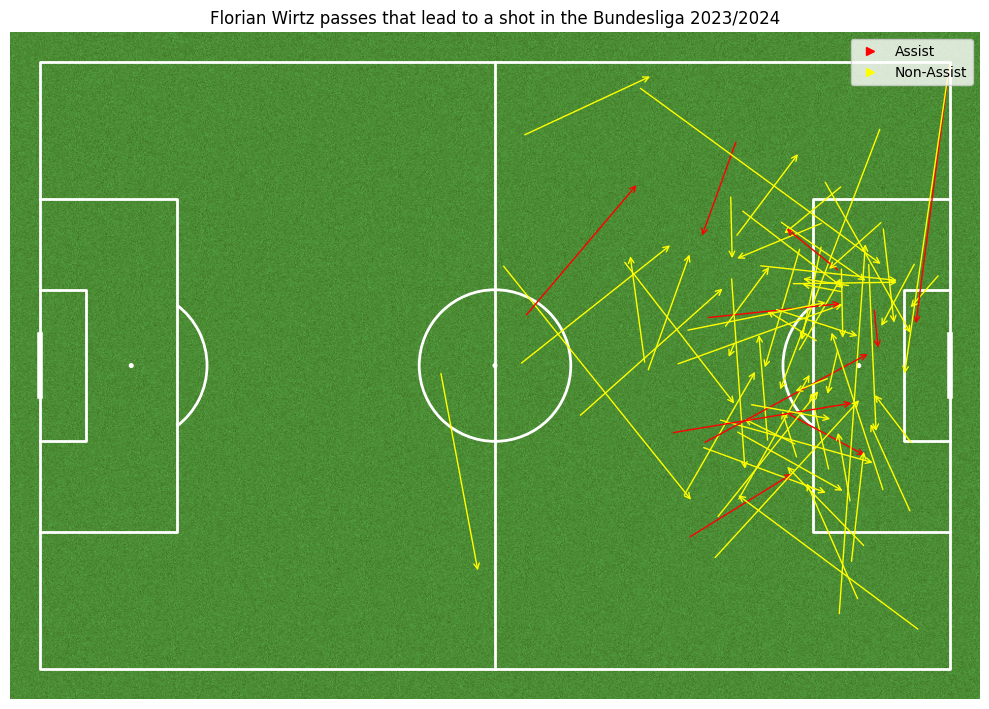

In [8]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=False)
fig, ax = pitch.draw(figsize=(10, 10))

for i in range(len(wirtz_passes)):
    if 'assisted_shot_id' in wirtz_passes.iloc[i]['pass']:
        x_start = wirtz_passes.iloc[i]['location'][0]
        y_start = wirtz_passes.iloc[i]['location'][1]
        x_end = wirtz_passes.iloc[i]['pass']['end_location'][0]
        y_end = wirtz_passes.iloc[i]['pass']['end_location'][1]
        shots = sb.events(match_id=wirtz_passes.iloc[i]['match_id'], split=True, flatten_attrs=False)["shots"]
        shot = shots[shots['id'] == wirtz_passes.iloc[i]['pass']['assisted_shot_id']]
        if shot.iloc[0]['shot']['outcome']['name'] == 'Goal':
            ax.annotate("", xy=(x_end, y_end), xytext=(x_start, y_start),
                    arrowprops=dict(arrowstyle="->", color='red'))
        else:
            ax.annotate("", xy=(x_end, y_end), xytext=(x_start, y_start),
                    arrowprops=dict(arrowstyle="->", color='yellow'))

red_arrow = Line2D([0], [0], linestyle='none', marker='>', color='red', label='Assist')
yellow_arrow = Line2D([0], [0], linestyle='none', marker='>', color='yellow', label='Non-Assist')
plt.legend(handles=[red_arrow, yellow_arrow])

plt.title('Florian Wirtz passes that lead to a shot in the Bundesliga 2023/2024')
plt.show()